In [1]:
from ultralytics import YOLO
from PIL import Image
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from yolo_untils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

构建数据集, 其实就是包含画边框作为标签, 以及重新排列一下文件结构

In [ ]:
create_labels(
    dataset_path="/home/stellarlane/main/finetune/clinicDB/",
    truth_name="Ground Truth"
)
create_labels(
    dataset_path="/home/stellarlane/main/finetune/CVC-ColonDB/",
    truth_name="masks"
)
create_labels(
    dataset_path="/home/stellarlane/main/finetune/ETIS/",
    truth_name="masks"
)


In [ ]:
build_dataset_multipleDB_with_test([0.8, 0.1, 0.1],
                                    target_path="/home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col_ETIS_with_test/",
                                    source_paths=['/home/stellarlane/main/finetune/clinicDB/',
                                                '/home/stellarlane/main/finetune/CVC-ColonDB/',
                                                '/home/stellarlane/main/finetune/ETIS/'],
                                    image_folder_name="images")

In [ ]:
build_dataset_multipleDB(0.8, 
                         target_path="/home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col/",
                         source_paths=['/home/stellarlane/main/finetune/clinicDB/',
                                     '/home/stellarlane/main/finetune/CVC-ColonDB/'],
                         image_folder_name="images")
build_standalone_test_dataset(target_path="/home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col/", 
                              source_path='/home/stellarlane/main/finetune/ETIS/')


展示其中一笔训练数据

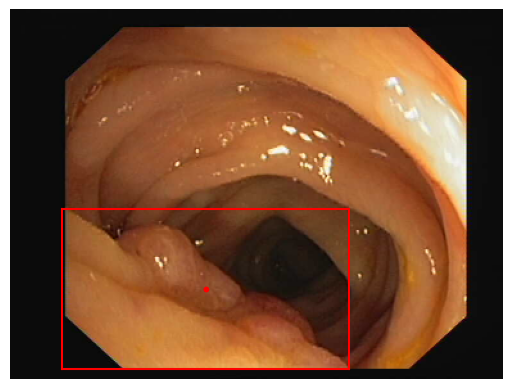

In [3]:
def show_exa(num, dataset_path = "../clinicDB/"):
    lines = read_txt_lines(f'{dataset_path}label/{num}.txt')
    for line in lines:
        parts = line.strip().split(' ')
    img = Image.open(f"{dataset_path}images/{num}.png")
    cords = [float(parts[1]) * img.size[0], float(parts[2]) * img.size[1], float(parts[3]) * img.size[0], float(parts[4]) * img.size[1]]
    plt.scatter(cords[0], cords[1], c='r', s=10)
    plt.plot([cords[0] - 0.5 * cords[2], cords[0] + 0.5 * cords[2]], [cords[1] - 0.5 * cords[3], cords[1] - 0.5 * cords[3]], c='r')
    plt.plot([cords[0] - 0.5 * cords[2], cords[0] + 0.5 * cords[2]], [cords[1] + 0.5 * cords[3], cords[1] + 0.5 * cords[3]], c='r')
    plt.plot([cords[0] - 0.5 * cords[2], cords[0] - 0.5 * cords[2]], [cords[1] - 0.5 * cords[3], cords[1] + 0.5 * cords[3]], c='r')
    plt.plot([cords[0] + 0.5 * cords[2], cords[0] + 0.5 * cords[2]], [cords[1] - 0.5 * cords[3], cords[1] + 0.5 * cords[3]], c='r')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

show_exa(1)


# 训练

使用clinicDB, colonDB和ETIS混合数据集训练

👇log可见 runs/train21

In [ ]:
model = YOLO("yolo11n.pt")
model.train(data = "mixed_cli_col_ETIS_with_test.yaml", epochs = 100, imgsz = 640, batch = 8)
model.save("yolo11n-trained-on-mixed-cli-col-ETIS.pt")

New https://pypi.org/project/ultralytics/8.3.115 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.105 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=mixed_cli_col_ETIS_with_test.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning /home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col_ETIS_with_test/labels/train.cache... 822 images, 0 backgrounds, 0 corrupt: 100%|██████████| 822/822 [00:00<?, ?it/s]
val: Scanning /home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col_ETIS_with_test/labels/val.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train21
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.16G      1.171      2.599      1.352         10        640: 100%|██████████| 103/103 [00:08<00:00, 11.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.80it/s]

                   all        117        126      0.596      0.532      0.557      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.38G      1.269      2.073      1.389          9        640: 100%|██████████| 103/103 [00:07<00:00, 13.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.04it/s]

                   all        117        126      0.585      0.389      0.424       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.38G      1.307      1.871      1.402         10        640: 100%|██████████| 103/103 [00:07<00:00, 14.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 2.800s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.31it/s]


                   all        117        126      0.479      0.508      0.472      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.38G      1.313      1.708      1.409         10        640: 100%|██████████| 103/103 [00:07<00:00, 14.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.69it/s]

                   all        117        126      0.672      0.649      0.671      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.38G      1.272      1.559      1.382         14        640: 100%|██████████| 103/103 [00:07<00:00, 14.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.04it/s]

                   all        117        126      0.649      0.659      0.702      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.38G      1.245      1.452       1.36          8        640: 100%|██████████| 103/103 [00:07<00:00, 14.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.37it/s]

                   all        117        126      0.898       0.49      0.678      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.38G      1.254      1.411      1.375         12        640: 100%|██████████| 103/103 [00:07<00:00, 14.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.56it/s]

                   all        117        126      0.815      0.595      0.727      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.38G      1.185      1.335      1.329          9        640: 100%|██████████| 103/103 [00:10<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.50it/s]

                   all        117        126      0.808      0.669      0.792      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.38G      1.151      1.215      1.302         14        640: 100%|██████████| 103/103 [00:07<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.42it/s]

                   all        117        126      0.761      0.643      0.737      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.38G      1.119      1.206      1.271         18        640: 100%|██████████| 103/103 [00:07<00:00, 14.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.49it/s]

                   all        117        126      0.783      0.688      0.756      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.38G      1.127      1.162      1.289         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        117        126      0.774      0.733       0.81      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.38G      1.134      1.125       1.29          6        640: 100%|██████████| 103/103 [00:07<00:00, 14.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.22it/s]

                   all        117        126      0.704      0.754      0.793      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.38G      1.088      1.095       1.26         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.55it/s]

                   all        117        126      0.859      0.714      0.848      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.38G      1.086      1.082      1.245         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.43it/s]

                   all        117        126      0.845      0.605      0.786      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.38G      1.062      1.077      1.239         17        640: 100%|██████████| 103/103 [00:07<00:00, 13.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        117        126      0.891      0.683      0.834      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.38G      1.055      1.047      1.243         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.43it/s]

                   all        117        126      0.782      0.778      0.821      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.38G      1.073      1.034      1.237          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.50it/s]

                   all        117        126      0.832       0.73      0.843      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.38G      1.044     0.9837      1.239         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.01it/s]

                   all        117        126      0.825      0.711       0.81      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.38G     0.9772     0.9067      1.183         12        640: 100%|██████████| 103/103 [00:10<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.50it/s]

                   all        117        126      0.875      0.832      0.897      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.38G      1.029     0.9574      1.228         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.34it/s]

                   all        117        126      0.731      0.733      0.767      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.38G      1.011     0.9171      1.207         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 13.92it/s]

                   all        117        126      0.847      0.747      0.856      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.38G      1.012     0.9143      1.202         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.59it/s]

                   all        117        126      0.856      0.799      0.875      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.38G     0.9674     0.8829       1.18         10        640: 100%|██████████| 103/103 [00:10<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.68it/s]

                   all        117        126      0.815       0.73      0.813      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.38G     0.9897     0.9114      1.193         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.52it/s]

                   all        117        126      0.869      0.786      0.874      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.38G     0.9426     0.8158      1.154         17        640: 100%|██████████| 103/103 [00:07<00:00, 13.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.92it/s]

                   all        117        126      0.786      0.756       0.84        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.38G     0.9365     0.8443      1.158         17        640: 100%|██████████| 103/103 [00:07<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.25it/s]

                   all        117        126      0.841       0.84      0.908      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.39G     0.9211     0.8251      1.148         11        640: 100%|██████████| 103/103 [00:10<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.58it/s]

                   all        117        126       0.88      0.722      0.861      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100       1.4G      0.953     0.8477      1.168          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.34it/s]

                   all        117        126      0.845      0.821      0.895      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.41G     0.9109     0.7961      1.147         12        640: 100%|██████████| 103/103 [00:07<00:00, 13.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.61it/s]

                   all        117        126      0.891      0.794      0.897      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.43G     0.8981     0.7925      1.155         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.19it/s]

                   all        117        126      0.876      0.881      0.916        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.44G     0.9061      0.781      1.154          8        640: 100%|██████████| 103/103 [00:10<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.54it/s]

                   all        117        126      0.895      0.878      0.921      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.44G     0.9388     0.8053      1.165          7        640: 100%|██████████| 103/103 [00:07<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.53it/s]

                   all        117        126      0.924      0.875      0.944      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.44G     0.9149     0.7587      1.155         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.17it/s]

                   all        117        126      0.921      0.833      0.904       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.44G     0.9267     0.7703       1.16         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.87it/s]

                   all        117        126      0.946      0.786      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.44G       0.91     0.7403      1.149         12        640: 100%|██████████| 103/103 [00:10<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.20it/s]

                   all        117        126      0.884       0.91      0.944      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.44G     0.9128      0.777      1.146          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.60it/s]

                   all        117        126      0.913      0.754       0.88      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.44G     0.8988     0.7501      1.136         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.64it/s]

                   all        117        126      0.886       0.77      0.889      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.44G     0.8991     0.7602      1.133         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.24it/s]

                   all        117        126      0.885      0.865      0.926      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.44G     0.8928     0.7417      1.136         10        640: 100%|██████████| 103/103 [00:10<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 13.94it/s]

                   all        117        126      0.922      0.841      0.923      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.44G     0.8351     0.6988      1.091          9        640: 100%|██████████| 103/103 [00:07<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.31it/s]

                   all        117        126      0.895      0.905      0.948      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.44G     0.8633     0.6764      1.106         14        640: 100%|██████████| 103/103 [00:07<00:00, 13.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.85it/s]

                   all        117        126       0.89      0.841      0.914      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.44G     0.8657     0.6805      1.115         12        640: 100%|██████████| 103/103 [00:07<00:00, 13.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.66it/s]

                   all        117        126      0.949      0.825       0.93      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.44G     0.8382     0.6579      1.094         13        640: 100%|██████████| 103/103 [00:10<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.02it/s]

                   all        117        126      0.932      0.874      0.953      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.44G     0.8385     0.7017      1.101         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.32it/s]

                   all        117        126      0.888      0.841      0.929      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.44G     0.8972     0.7246      1.145         14        640: 100%|██████████| 103/103 [00:07<00:00, 13.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.72it/s]

                   all        117        126      0.915      0.881      0.937      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.44G      0.855      0.705      1.116         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.70it/s]

                   all        117        126      0.962      0.808      0.939      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.44G     0.8162     0.6777       1.09         11        640: 100%|██████████| 103/103 [00:10<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.72it/s]

                   all        117        126      0.897      0.902      0.945      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.44G     0.8222     0.6698      1.093         12        640: 100%|██████████| 103/103 [00:07<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.98it/s]

                   all        117        126       0.87      0.881      0.933      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.44G     0.8175     0.6624      1.099          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.21it/s]

                   all        117        126      0.901      0.825      0.913      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.44G     0.8212     0.6773       1.09         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.69it/s]

                   all        117        126      0.902      0.872      0.921        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.44G     0.8115     0.6358      1.078         13        640: 100%|██████████| 103/103 [00:10<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.15it/s]

                   all        117        126      0.932      0.841      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.44G     0.8099     0.6224      1.091         12        640: 100%|██████████| 103/103 [00:07<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.83it/s]

                   all        117        126      0.893      0.864      0.944      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.44G     0.8044     0.6173      1.084         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.63it/s]

                   all        117        126       0.95      0.833      0.939      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.44G     0.7934     0.6193      1.072         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        117        126      0.964      0.856      0.956      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.44G     0.8003     0.5996      1.079         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.36it/s]

                   all        117        126      0.959      0.857      0.941      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.44G     0.8205     0.6204      1.084         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.04it/s]

                   all        117        126      0.921      0.832      0.926      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.44G      0.794     0.6081      1.068         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.21it/s]

                   all        117        126      0.915      0.853       0.93      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.44G     0.7839     0.6062      1.056         14        640: 100%|██████████| 103/103 [00:10<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.55it/s]

                   all        117        126      0.931      0.825      0.937      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.44G     0.7686     0.5983      1.054         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.57it/s]

                   all        117        126        0.9      0.913      0.948      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.44G     0.7711     0.5888      1.067         17        640: 100%|██████████| 103/103 [00:07<00:00, 13.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.32it/s]

                   all        117        126      0.964      0.889      0.948      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.44G     0.7831     0.5864       1.08         12        640: 100%|██████████| 103/103 [00:07<00:00, 13.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.47it/s]

                   all        117        126      0.966      0.901      0.952      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.44G     0.7859     0.5793      1.066         15        640: 100%|██████████| 103/103 [00:10<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.45it/s]

                   all        117        126      0.962      0.873      0.946      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.44G     0.7572     0.5653      1.049          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.69it/s]

                   all        117        126      0.887      0.931      0.952      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.44G     0.7222     0.5324      1.042          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.15it/s]

                   all        117        126      0.923      0.897      0.943      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.44G     0.7714     0.5732      1.063          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.47it/s]

                   all        117        126      0.926      0.889      0.957      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.44G     0.7391     0.5412      1.041         17        640: 100%|██████████| 103/103 [00:10<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.93it/s]

                   all        117        126      0.942      0.911      0.953      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.44G     0.7387     0.5528      1.041          9        640: 100%|██████████| 103/103 [00:07<00:00, 13.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.62it/s]

                   all        117        126      0.934      0.881      0.941      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.44G     0.7442     0.5273      1.049         14        640: 100%|██████████| 103/103 [00:07<00:00, 13.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.19it/s]

                   all        117        126      0.923      0.865       0.94      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.44G     0.7424     0.5343      1.046         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.13it/s]

                   all        117        126      0.949      0.886      0.943      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.44G     0.7421     0.5483      1.054         10        640: 100%|██████████| 103/103 [00:10<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.35it/s]

                   all        117        126      0.922      0.889      0.946      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.44G     0.7235     0.5235      1.037         16        640: 100%|██████████| 103/103 [00:07<00:00, 13.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.92it/s]

                   all        117        126      0.945      0.913      0.958      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.44G     0.7226     0.5184      1.036         14        640: 100%|██████████| 103/103 [00:07<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.71it/s]

                   all        117        126      0.898      0.907      0.944      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.44G     0.7216     0.5304      1.045          9        640: 100%|██████████| 103/103 [00:07<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.48it/s]

                   all        117        126      0.913      0.833      0.916      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.44G     0.7197       0.51      1.044         14        640: 100%|██████████| 103/103 [00:10<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.79it/s]

                   all        117        126      0.929       0.81      0.926      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.44G     0.7141     0.5031      1.027         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.73it/s]

                   all        117        126      0.913      0.913      0.947       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.44G     0.7153     0.4988      1.029         18        640: 100%|██████████| 103/103 [00:07<00:00, 13.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.26it/s]

                   all        117        126      0.865      0.912      0.938      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.44G       0.69      0.491      1.016         10        640: 100%|██████████| 103/103 [00:07<00:00, 13.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.16it/s]

                   all        117        126      0.932      0.881      0.937      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.44G      0.678     0.4925      1.013         12        640: 100%|██████████| 103/103 [00:10<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.59it/s]

                   all        117        126      0.875      0.905      0.938      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.46G     0.7147     0.5068      1.032          7        640: 100%|██████████| 103/103 [00:07<00:00, 13.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.29it/s]

                   all        117        126      0.912      0.881      0.943       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.47G     0.6993     0.4977      1.026         17        640: 100%|██████████| 103/103 [00:07<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.10it/s]

                   all        117        126      0.893      0.926      0.946      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.47G     0.7034     0.4942      1.033          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 13.68it/s]

                   all        117        126      0.915      0.881      0.945      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.47G     0.6801     0.4839      1.004         11        640: 100%|██████████| 103/103 [00:10<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.20it/s]

                   all        117        126      0.912      0.901      0.944      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.47G     0.6515      0.485      1.005         11        640: 100%|██████████| 103/103 [00:07<00:00, 13.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.40it/s]

                   all        117        126      0.971      0.897      0.969      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.47G     0.6605     0.4606      1.002         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.70it/s]

                   all        117        126      0.931      0.853       0.95      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.47G     0.6743     0.4552      1.012         15        640: 100%|██████████| 103/103 [00:07<00:00, 13.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        117        126      0.964      0.865      0.949       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.47G     0.6482     0.4568     0.9977          9        640: 100%|██████████| 103/103 [00:07<00:00, 13.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.91it/s]

                   all        117        126      0.905      0.904      0.941      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.47G     0.6592     0.4587      1.001          8        640: 100%|██████████| 103/103 [00:07<00:00, 13.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.29it/s]

                   all        117        126      0.964      0.839      0.941      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.47G     0.6659     0.4473      1.005         16        640: 100%|██████████| 103/103 [00:07<00:00, 13.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.81it/s]

                   all        117        126      0.957      0.889      0.961      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.47G     0.6375     0.4411     0.9971         10        640: 100%|██████████| 103/103 [00:10<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.11it/s]

                   all        117        126      0.942      0.909      0.952       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.47G     0.6333     0.4379     0.9865         13        640: 100%|██████████| 103/103 [00:07<00:00, 13.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.29it/s]

                   all        117        126       0.92      0.921      0.959      0.778


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.47G     0.5801     0.3572     0.9409          8        640: 100%|██████████| 103/103 [00:11<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 13.68it/s]

                   all        117        126      0.942      0.881       0.95       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.47G     0.5521     0.3368     0.9255          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.01it/s]

                   all        117        126      0.921      0.924      0.954      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.47G     0.5552     0.3206     0.9185          6        640: 100%|██████████| 103/103 [00:10<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.12it/s]

                   all        117        126      0.932      0.913      0.955      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.47G     0.5459     0.3242     0.9266          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 15.28it/s]

                   all        117        126      0.922      0.881      0.941      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.47G     0.5495     0.3223     0.9243          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.30it/s]

                   all        117        126      0.913      0.919       0.95      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.47G     0.5391     0.3164     0.9184          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.58it/s]

                   all        117        126       0.92      0.911      0.938       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.47G     0.5353     0.2987     0.9104          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.71it/s]

                   all        117        126      0.913      0.912      0.944      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.47G      0.519     0.3039     0.8979          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.67it/s]

                   all        117        126      0.944      0.881      0.946      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.47G     0.5286     0.3035     0.9092          6        640: 100%|██████████| 103/103 [00:07<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.45it/s]

                   all        117        126       0.94      0.873      0.945       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.47G     0.5154     0.2981     0.9032          6        640: 100%|██████████| 103/103 [00:10<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 14.21it/s]

                   all        117        126      0.948      0.862      0.939      0.784



100 epochs completed in 0.253 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 5.5MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]


                   all        117        126      0.942      0.909      0.952       0.79
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 7.1ms postprocess per image
Results saved to runs/detect/train21


使用clinicDB, colonDB混合训练

👇log可见 runs/train27

In [2]:
model = YOLO("yolo11n.pt")
model.train(data = "./configs/mixed_cli_col.yaml", epochs = 100, imgsz = 640, batch = 8)
model.save("yolo11n-trained-on-mixed-cli-col.pt")

New https://pypi.org/project/ultralytics/8.3.134 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.105 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=./configs/mixed_cli_col.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train27, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, s

train: Scanning /home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col/labels/train.cache... 709 images, 0 backgrounds, 0 corrupt: 100%|██████████| 709/709 [00:00<?, ?it/s]
val: Scanning /home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col/labels/val.cache... 182 images, 0 backgrounds, 0 corrupt: 100%|██████████| 182/182 [00:00<?, ?it/s]


Plotting labels to runs/detect/train27/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train27
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.19G      1.159       2.58      1.353         12        640: 100%|██████████| 89/89 [00:09<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.43it/s]

                   all        182        187      0.626      0.528      0.571      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.36G       1.31      2.145      1.437          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.67it/s]

                   all        182        187       0.47      0.594      0.565      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.36G      1.334      1.947      1.457         12        640: 100%|██████████| 89/89 [00:07<00:00, 12.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.37it/s]

                   all        182        187      0.681      0.594      0.682      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.37G      1.317      1.774      1.437         12        640: 100%|██████████| 89/89 [00:06<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.64it/s]

                   all        182        187       0.64      0.589      0.656      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.37G      1.292      1.616      1.423          8        640: 100%|██████████| 89/89 [00:07<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.76it/s]

                   all        182        187      0.616       0.55       0.58      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.37G      1.259       1.51      1.392         15        640: 100%|██████████| 89/89 [00:07<00:00, 12.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.22it/s]

                   all        182        187      0.704      0.661      0.713      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.37G      1.277      1.433      1.383          9        640: 100%|██████████| 89/89 [00:07<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.02it/s]

                   all        182        187      0.733      0.471      0.636      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.37G      1.208      1.372      1.377         10        640: 100%|██████████| 89/89 [00:07<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.51it/s]

                   all        182        187      0.837       0.74      0.836      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.37G      1.207      1.325      1.369         15        640: 100%|██████████| 89/89 [00:07<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.20it/s]

                   all        182        187      0.855      0.757      0.865      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.37G      1.174      1.187      1.321         14        640: 100%|██████████| 89/89 [00:07<00:00, 12.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.42it/s]

                   all        182        187      0.827      0.786      0.872      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.37G      1.165      1.215      1.322          8        640: 100%|██████████| 89/89 [00:07<00:00, 11.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.48it/s]

                   all        182        187      0.895      0.802      0.903      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.37G      1.112      1.143      1.286          7        640: 100%|██████████| 89/89 [00:07<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.63it/s]

                   all        182        187      0.904      0.702      0.871      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.38G      1.106      1.118      1.272          6        640: 100%|██████████| 89/89 [00:07<00:00, 12.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.13it/s]

                   all        182        187      0.828      0.786      0.885      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.38G      1.086      1.081      1.252         12        640: 100%|██████████| 89/89 [00:07<00:00, 12.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.85it/s]

                   all        182        187      0.847      0.759      0.856      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.38G      1.064      1.019      1.241         11        640: 100%|██████████| 89/89 [00:07<00:00, 12.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.99it/s]

                   all        182        187      0.868      0.741      0.849       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.38G      1.062      1.062      1.257          8        640: 100%|██████████| 89/89 [00:07<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.73it/s]

                   all        182        187      0.852      0.684      0.799      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.38G      1.095      1.067      1.273         11        640: 100%|██████████| 89/89 [00:07<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.70it/s]

                   all        182        187      0.904      0.797      0.907      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       1.4G      1.091      1.032      1.266         14        640: 100%|██████████| 89/89 [00:07<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.62it/s]

                   all        182        187      0.883       0.85      0.901      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       1.4G      1.064      1.049      1.245          8        640: 100%|██████████| 89/89 [00:07<00:00, 11.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.74it/s]

                   all        182        187      0.947      0.738      0.911      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.4G      1.021     0.9916      1.219         12        640: 100%|██████████| 89/89 [00:07<00:00, 12.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.76it/s]

                   all        182        187      0.932      0.866      0.945      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.4G      1.009     0.9557      1.212         12        640: 100%|██████████| 89/89 [00:07<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.24it/s]

                   all        182        187      0.931      0.859      0.941      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100       1.4G     0.9755     0.9423      1.188         13        640: 100%|██████████| 89/89 [00:07<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.24it/s]

                   all        182        187      0.935      0.847      0.949       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       1.4G     0.9756      0.878      1.173         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.81it/s]

                   all        182        187      0.906      0.873      0.943      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       1.4G     0.9935     0.9169       1.21         14        640: 100%|██████████| 89/89 [00:10<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  7.75it/s]

                   all        182        187      0.923      0.836      0.932      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.41G      1.002     0.9342       1.21         10        640: 100%|██████████| 89/89 [00:09<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.94it/s]

                   all        182        187       0.91      0.882      0.948      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.41G     0.9892     0.8955      1.199         10        640: 100%|██████████| 89/89 [00:07<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.51it/s]

                   all        182        187      0.937      0.861      0.934      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.41G     0.9655     0.8737      1.191         11        640: 100%|██████████| 89/89 [00:07<00:00, 11.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.83it/s]

                   all        182        187      0.889      0.898      0.958      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.41G     0.9517     0.8358      1.182         11        640: 100%|██████████| 89/89 [00:08<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.10it/s]

                   all        182        187        0.9      0.865      0.944      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.41G     0.9401     0.7925      1.166         12        640: 100%|██████████| 89/89 [00:07<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.30it/s]

                   all        182        187      0.933      0.856      0.937      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.41G     0.9497     0.8074      1.176          6        640: 100%|██████████| 89/89 [00:07<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.13it/s]

                   all        182        187      0.959      0.871      0.946      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.41G     0.9376     0.7886      1.151          8        640: 100%|██████████| 89/89 [00:07<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.80it/s]

                   all        182        187      0.971      0.882      0.967      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.41G     0.9366      0.799      1.169         13        640: 100%|██████████| 89/89 [00:07<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.79it/s]

                   all        182        187      0.929      0.909      0.962      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.41G     0.9161     0.7819       1.16         12        640: 100%|██████████| 89/89 [00:07<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.16it/s]

                   all        182        187       0.93      0.918      0.961      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.41G     0.9462     0.8134      1.163         11        640: 100%|██████████| 89/89 [00:07<00:00, 12.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.92it/s]

                   all        182        187       0.93      0.882      0.954      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.41G     0.9117     0.7939      1.151         10        640: 100%|██████████| 89/89 [00:07<00:00, 12.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.61it/s]

                   all        182        187      0.925      0.909      0.961      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.41G     0.8834     0.7729      1.136         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 13.06it/s]

                   all        182        187      0.871      0.914      0.943      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.41G     0.8954     0.7767      1.152         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.82it/s]

                   all        182        187      0.908      0.861      0.935      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.41G     0.9107     0.7731      1.168          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.84it/s]

                   all        182        187      0.897      0.837      0.923      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.41G     0.9015      0.711      1.133         15        640: 100%|██████████| 89/89 [00:07<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.82it/s]

                   all        182        187      0.951      0.914      0.965      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.41G     0.8857     0.7272      1.135         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.99it/s]

                   all        182        187      0.954      0.895      0.961      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.41G      0.877     0.7459      1.144          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.73it/s]

                   all        182        187      0.972      0.923      0.979      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.41G     0.8543     0.6983      1.122         11        640: 100%|██████████| 89/89 [00:07<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.45it/s]

                   all        182        187      0.961      0.919      0.972      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.41G     0.8505     0.7041      1.107         13        640: 100%|██████████| 89/89 [00:08<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.87it/s]

                   all        182        187      0.933       0.89      0.957      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.41G     0.8642     0.7146      1.109          8        640: 100%|██████████| 89/89 [00:08<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.24it/s]

                   all        182        187      0.954      0.884      0.954      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.41G     0.8624     0.6679      1.122          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.21it/s]

                   all        182        187      0.959       0.92      0.958      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.41G     0.8405      0.681      1.103         11        640: 100%|██████████| 89/89 [00:08<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.39it/s]

                   all        182        187       0.98       0.92      0.968      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.41G     0.8233     0.6696      1.101         11        640: 100%|██████████| 89/89 [00:08<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.96it/s]

                   all        182        187      0.953      0.936      0.971      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.41G     0.8275     0.6655      1.099          4        640: 100%|██████████| 89/89 [00:08<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.64it/s]

                   all        182        187      0.948      0.883      0.962      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.41G     0.8456     0.6725      1.109          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.85it/s]

                   all        182        187      0.948       0.93      0.968      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.41G      0.828     0.6337      1.103         13        640: 100%|██████████| 89/89 [00:07<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.71it/s]

                   all        182        187      0.931      0.944      0.971      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.41G     0.7958     0.6447      1.088         10        640: 100%|██████████| 89/89 [00:08<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]

                   all        182        187      0.947      0.914      0.972      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.41G     0.7877     0.6198      1.078         12        640: 100%|██████████| 89/89 [00:07<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.65it/s]

                   all        182        187      0.961      0.952      0.984      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.41G     0.7828     0.6336      1.083         10        640: 100%|██████████| 89/89 [00:08<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.62it/s]

                   all        182        187      0.966      0.898      0.965      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.41G     0.8085      0.615      1.098          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.60it/s]

                   all        182        187      0.946      0.947      0.978      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.41G     0.8187     0.6086      1.089         12        640: 100%|██████████| 89/89 [00:08<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.18it/s]

                   all        182        187      0.979      0.925      0.978      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.41G      0.804      0.619      1.083          9        640: 100%|██████████| 89/89 [00:07<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.77it/s]

                   all        182        187      0.956       0.93      0.976      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.41G     0.7909     0.6204      1.078         10        640: 100%|██████████| 89/89 [00:08<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.31it/s]

                   all        182        187      0.981      0.909       0.97      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.41G     0.7966     0.5894       1.08         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.85it/s]

                   all        182        187      0.927      0.936      0.972      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.41G     0.7724     0.5902      1.056          5        640: 100%|██████████| 89/89 [00:07<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.67it/s]

                   all        182        187      0.964      0.941      0.976      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.41G     0.7811     0.6163      1.075         10        640: 100%|██████████| 89/89 [00:09<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.05it/s]

                   all        182        187       0.96      0.941       0.97      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.41G     0.7883     0.5948      1.076         12        640: 100%|██████████| 89/89 [00:08<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.29it/s]

                   all        182        187      0.967      0.945      0.973       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.41G     0.7821     0.6037      1.074         14        640: 100%|██████████| 89/89 [00:07<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.09it/s]

                   all        182        187      0.965      0.925      0.963      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.41G     0.7551     0.5753      1.063          9        640: 100%|██████████| 89/89 [00:08<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.79it/s]

                   all        182        187      0.972      0.927      0.974      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.41G     0.7617     0.5843      1.046         12        640: 100%|██████████| 89/89 [00:08<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.42it/s]

                   all        182        187      0.952      0.946      0.974      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.41G     0.7525     0.5802      1.069          5        640: 100%|██████████| 89/89 [00:08<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.70it/s]

                   all        182        187      0.977      0.898       0.97      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.41G     0.7617     0.5833      1.066         11        640: 100%|██████████| 89/89 [00:08<00:00, 10.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.44it/s]

                   all        182        187      0.952      0.936      0.974      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.41G     0.7138     0.5381      1.037         12        640: 100%|██████████| 89/89 [00:08<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.87it/s]

                   all        182        187      0.962       0.95      0.978      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.41G     0.7516      0.567      1.065         12        640: 100%|██████████| 89/89 [00:08<00:00, 10.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.53it/s]

                   all        182        187      0.936      0.947      0.978       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.41G     0.7178     0.5363      1.039          9        640: 100%|██████████| 89/89 [00:08<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.71it/s]

                   all        182        187      0.961      0.928      0.984      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.41G     0.7267     0.5472      1.054          6        640: 100%|██████████| 89/89 [00:08<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.53it/s]

                   all        182        187      0.963      0.947      0.984      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.41G     0.7163     0.5472      1.046         10        640: 100%|██████████| 89/89 [00:08<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.51it/s]

                   all        182        187      0.962      0.956      0.987      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.41G     0.7284      0.548      1.044         12        640: 100%|██████████| 89/89 [00:08<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.97it/s]

                   all        182        187      0.978      0.941      0.982      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.41G     0.7092     0.5211      1.032         13        640: 100%|██████████| 89/89 [00:08<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.56it/s]

                   all        182        187      0.986      0.941       0.98      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.41G     0.7158     0.5139      1.046         10        640: 100%|██████████| 89/89 [00:08<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]

                   all        182        187      0.989      0.949      0.984      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.41G     0.6991     0.5307      1.042          7        640: 100%|██████████| 89/89 [00:07<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.51it/s]

                   all        182        187      0.962      0.941      0.984       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.41G     0.6787     0.5022      1.011          6        640: 100%|██████████| 89/89 [00:07<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.29it/s]

                   all        182        187      0.962      0.951      0.984        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.41G     0.6979     0.5044      1.024          8        640: 100%|██████████| 89/89 [00:07<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.51it/s]

                   all        182        187      0.978      0.938      0.982      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.41G     0.6741     0.4985      1.018         11        640: 100%|██████████| 89/89 [00:07<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.30it/s]

                   all        182        187      0.955      0.952      0.981      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.41G     0.7035     0.5131      1.028          6        640: 100%|██████████| 89/89 [00:07<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.77it/s]

                   all        182        187      0.961      0.927      0.979       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.41G     0.6686     0.4809      1.011         13        640: 100%|██████████| 89/89 [00:08<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.49it/s]

                   all        182        187      0.967      0.949      0.979        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.43G     0.6712     0.4897      1.015         11        640: 100%|██████████| 89/89 [00:07<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.34it/s]

                   all        182        187      0.966      0.963      0.982      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.43G     0.6805     0.4784      1.013          9        640: 100%|██████████| 89/89 [00:07<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.23it/s]

                   all        182        187       0.99      0.925      0.976      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.43G     0.6813     0.4782      1.013         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.46it/s]

                   all        182        187      0.982      0.925      0.976      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.43G     0.6724     0.4912      1.021         16        640: 100%|██████████| 89/89 [00:07<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.14it/s]

                   all        182        187      0.989      0.929      0.978      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.43G     0.6735     0.4735      1.008         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.98it/s]

                   all        182        187       0.98      0.952      0.979      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.43G     0.6562     0.4706      1.007         12        640: 100%|██████████| 89/89 [00:08<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.22it/s]

                   all        182        187      0.966      0.957       0.98      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.43G     0.6573     0.4798      1.012         10        640: 100%|██████████| 89/89 [00:08<00:00, 10.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 10.93it/s]

                   all        182        187      0.967      0.951      0.982      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.43G     0.6431     0.4558      1.006         16        640: 100%|██████████| 89/89 [00:08<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.52it/s]

                   all        182        187      0.975      0.957      0.985      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.43G       0.64     0.4645          1         10        640: 100%|██████████| 89/89 [00:07<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.11it/s]

                   all        182        187      0.963      0.962      0.983      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.43G     0.6058     0.4475     0.9882         10        640: 100%|██████████| 89/89 [00:08<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.68it/s]

                   all        182        187      0.994       0.94      0.983      0.814


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.43G     0.5811     0.3636     0.9572          5        640: 100%|██████████| 89/89 [00:08<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.26it/s]

                   all        182        187      0.972      0.957      0.982      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.43G     0.5651     0.3412     0.9373          5        640: 100%|██████████| 89/89 [00:08<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.53it/s]

                   all        182        187      0.978      0.957      0.983      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.43G     0.5601     0.3345     0.9368          5        640: 100%|██████████| 89/89 [00:08<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.46it/s]

                   all        182        187      0.978      0.971      0.985      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.43G     0.5347     0.3201     0.9296          5        640: 100%|██████████| 89/89 [00:08<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.24it/s]

                   all        182        187      0.984       0.96      0.984      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.43G     0.5347     0.3211      0.923          5        640: 100%|██████████| 89/89 [00:08<00:00, 10.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.35it/s]

                   all        182        187      0.973      0.966      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.43G     0.5354     0.3243     0.9167          5        640: 100%|██████████| 89/89 [00:07<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.67it/s]

                   all        182        187      0.966      0.957      0.985      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.43G     0.5421     0.3269     0.9245          5        640: 100%|██████████| 89/89 [00:08<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.07it/s]

                   all        182        187      0.978      0.956      0.984      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.43G     0.5262      0.312     0.9245          5        640: 100%|██████████| 89/89 [00:07<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 11.62it/s]

                   all        182        187      0.984      0.964      0.986      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.43G     0.5291     0.3155     0.9145          5        640: 100%|██████████| 89/89 [00:08<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:00<00:00, 12.16it/s]

                   all        182        187      0.984      0.967      0.986      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.43G     0.5317     0.3115     0.9117          5        640: 100%|██████████| 89/89 [00:07<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00, 12.00it/s]

                   all        182        187      0.984      0.968      0.985      0.818



100 epochs completed in 0.256 hours.
Optimizer stripped from runs/detect/train27/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train27/weights/best.pt, 5.5MB

Validating runs/detect/train27/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  8.27it/s]


                   all        182        187      0.982      0.963      0.986      0.822
Speed: 0.3ms preprocess, 1.5ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train27


# 测试

用预留测试集验证三数据集联合微调的模型

👇log可见runs/detect/val10

In [3]:
model_1 = YOLO("./models/yolo11n-trained-on-mixed-cli-col-ETIS.pt")
results_test = model_1.val(data="./configs/mixed_cli_col_ETIS_with_test.yaml", split="test")
print(f"Precision: {results_test.box.map50}") 
print(f"Recall: {results_test.box.mr}")        
print(f"mAP50-95: {results_test.box.map}")     

Ultralytics 8.3.105 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col_ETIS_with_test/labels/test.cache... 113 images, 0 backgrounds, 0 corrupt: 100%|██████████| 113/113 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.29it/s]


                   all        113        116      0.954      0.931      0.961        0.8
Speed: 1.4ms preprocess, 6.8ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val10
Precision: 0.9606339043897235
Recall: 0.9310344827586207
mAP50-95: 0.8004010098130813


用ETIS数据集验证在clinicDB和colonDB上微调的模型

👇log可见 runs/detect/val11

In [4]:
model_2 = YOLO("./models/yolo11n-trained-on-mixed-cli-col.pt")
results_test = model_2.val(data="./configs/mixed_cli_col.yaml", split="test")
print(f"Precision: {results_test.box.map50}") 
print(f"Recall: {results_test.box.mr}")        
print(f"mAP50-95: {results_test.box.map}")     

Ultralytics 8.3.105 🚀 Python-3.13.2 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /home/stellarlane/main/finetune/yolo/datasets/mixed_cli_col/labels/test.cache... 196 images, 0 backgrounds, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]


                   all        196        208      0.749      0.625       0.68      0.487
Speed: 3.2ms preprocess, 3.5ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val11
Precision: 0.6796820068269729
Recall: 0.625
mAP50-95: 0.4868635927493717


看一下实际的检测效果!

100%|██████████| 5.35M/5.35M [00:00<00:00, 13.3MB/s]



image 1/1 /home/stellarlane/main/finetune/yolo/../clinicDB/images/1.png: 480x640 3 donuts, 34.9ms
Speed: 3.1ms preprocess, 34.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)


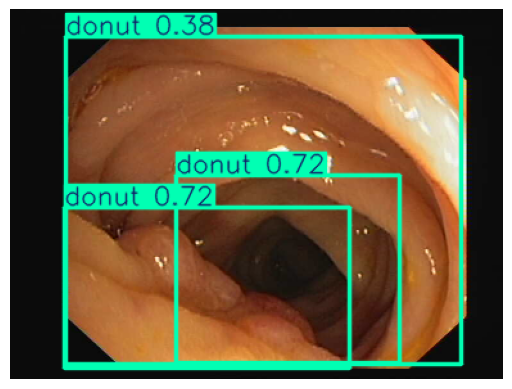


image 1/1 /home/stellarlane/main/finetune/yolo/../clinicDB/images/1.png: 480x640 1 target, 19.9ms
Speed: 3.0ms preprocess, 19.9ms inference, 3.7ms postprocess per image at shape (1, 3, 480, 640)


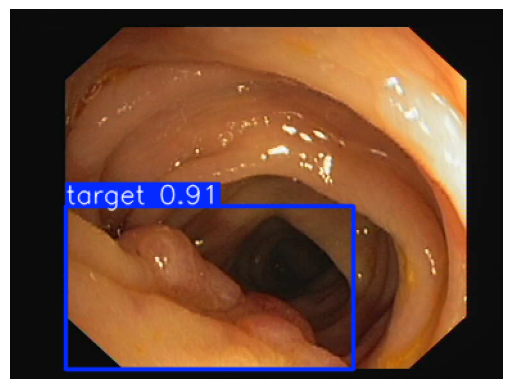


image 1/1 /home/stellarlane/main/finetune/yolo/../clinicDB/images/1.png: 480x640 1 target, 25.7ms
Speed: 3.7ms preprocess, 25.7ms inference, 3.6ms postprocess per image at shape (1, 3, 480, 640)


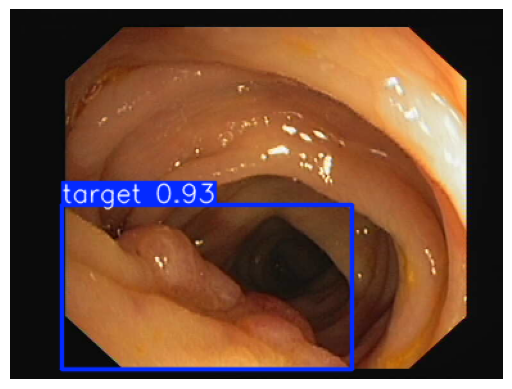

In [6]:
model_org = YOLO("./yolo11n.pt")

def show_pic(model):
    results = model("../clinicDB/images/1.png")
    annotated_img = results[0].plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()
show_pic(model_org)
show_pic(model_1)
show_pic(model_2)